
Factors likely to lead to survival (sorted by survival rate percentage):
       Feature  Coefficient  Survival Rate (%)
3   Sex_female     0.644796          73.877551
8     Pclass_1     0.373538          60.736196
1         Fare     0.178885          56.684208
5   Embarked_C     0.102231          54.400000
9     Pclass_2     0.153228          48.344371
2   FamilySize    -0.378107          37.790698
6   Embarked_Q     0.020662          36.666667
0          Age    -0.378968          36.592678
7   Embarked_S    -0.101777          33.776091
10    Pclass_3    -0.442242          24.120603
4     Sex_male    -0.644796          18.629550

Additional breakdown of survival rates within each category:

Survival rates within Sex_female:
  Unable to provide additional breakdown for this feature.

Survival rates within Pclass_1:
  Pclass_1:
    Male: 34.41%
    Female: 95.71%

Survival rates within Fare:
  Unable to provide additional breakdown for Fare.

Survival rates within Embarked_C:
  Embarked

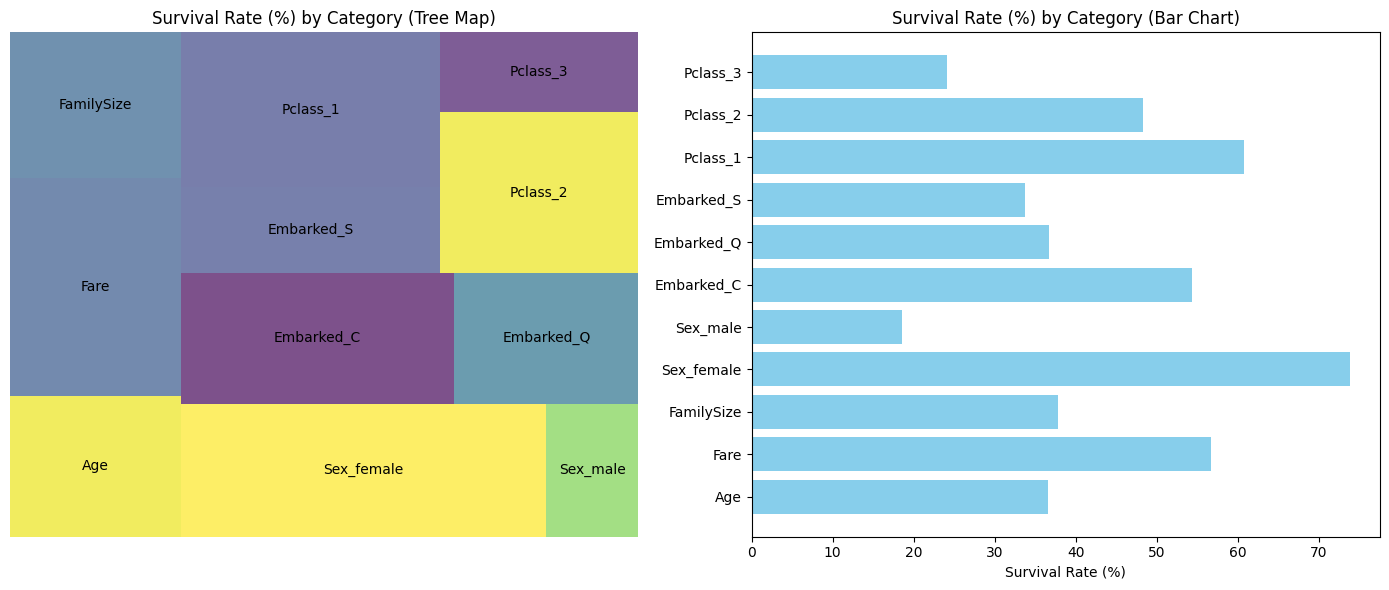

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import squarify

# Load the Titanic dataset
data = pd.read_csv('/titanic.csv')

# Data preprocessing
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Pclass'])

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get feature names
feature_names = X.columns

# Get coefficients of the trained logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate survival rate percentage for each category within each feature
survival_rate_percentage = []
for feature in X.columns:
    survived_count = X_train[y_train == 1][feature].sum()
    total_count = X_train[feature].sum()
    survival_rate = (survived_count / total_count) * 100 if total_count > 0 else 0.00
    survival_rate_percentage.append(survival_rate)

coefficients_df['Survival Rate (%)'] = survival_rate_percentage

# Sort DataFrame based on survival rate percentage
coefficients_df = coefficients_df.sort_values(by='Survival Rate (%)', ascending=False)

# Display the results
print("\nFactors likely to lead to survival (sorted by survival rate percentage):")
print(coefficients_df)

# Additional breakdown of survival rates within each category
print("\nAdditional breakdown of survival rates within each category:")

for index, row in coefficients_df.iterrows():
    feature = row['Feature']
    print(f"\nSurvival rates within {feature}:")
    if 'Pclass' in feature:
        pclass_survival = {}
        for pclass in ['Pclass_1', 'Pclass_2', 'Pclass_3']:
            if pclass in feature:
                survival_count_male = X_train[(y_train == 1) & (X_train[pclass] == 1) & (X_train['Sex_male'] == 1)][feature].sum()
                total_count_male = X_train[(X_train[pclass] == 1) & (X_train['Sex_male'] == 1)][feature].sum()
                survival_rate_male = (survival_count_male / total_count_male) * 100 if total_count_male > 0 else 0.00

                survival_count_female = X_train[(y_train == 1) & (X_train[pclass] == 1) & (X_train['Sex_female'] == 1)][feature].sum()
                total_count_female = X_train[(X_train[pclass] == 1) & (X_train['Sex_female'] == 1)][feature].sum()
                survival_rate_female = (survival_count_female / total_count_female) * 100 if total_count_female > 0 else 0.00

                pclass_survival[pclass] = {'Male': survival_rate_male, 'Female': survival_rate_female}
        for pclass, rates in pclass_survival.items():
            print(f"  {pclass}:")
            print(f"    Male: {rates['Male']:.2f}%")
            print(f"    Female: {rates['Female']:.2f}%")
    elif 'Embarked' in feature:
        embarked_survival = {}
        for embarked in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
            if embarked in feature:
                survival_count_male = X_train[(y_train == 1) & (X_train[embarked] == 1) & (X_train['Sex_male'] == 1)][feature].sum()
                total_count_male = X_train[(X_train[embarked] == 1) & (X_train['Sex_male'] == 1)][feature].sum()
                survival_rate_male = (survival_count_male / total_count_male) * 100 if total_count_male > 0 else 0.00

                survival_count_female = X_train[(y_train == 1) & (X_train[embarked] == 1) & (X_train['Sex_female'] == 1)][feature].sum()
                total_count_female = X_train[(X_train[embarked] == 1) & (X_train['Sex_female'] == 1)][feature].sum()
                survival_rate_female = (survival_count_female / total_count_female) * 100 if total_count_female > 0 else 0.00

                embarked_survival[embarked] = {'Male': survival_rate_male, 'Female': survival_rate_female}
        for embarked, rates in embarked_survival.items():
            print(f"  {embarked}:")
            print(f"    Male: {rates['Male']:.2f}%")
            print(f"    Female: {rates['Female']:.2f}%")
    elif 'Fare' in feature:
        fare_survival = {}
        print(f"  Unable to provide additional breakdown for {feature}.")
    else:
        print("  Unable to provide additional breakdown for this feature.")

# Summary
print("\nSummary:")
print("The passengers with the highest survival rate within each category are as follows:")
for index, row in coefficients_df.iterrows():
    feature = row['Feature']
    if 'Pclass' in feature or 'Embarked' in feature:
        category = feature.split('_')[-1]
        highest_survival = coefficients_df[coefficients_df['Feature'].str.contains(category)].iloc[0]
        print(f"- {highest_survival['Feature']}: {highest_survival['Survival Rate (%)']:.2f}%")

# Extract survival rates for each category
category_survival_df = pd.DataFrame({'Category': feature_names, 'Survival Rate (%)': survival_rate_percentage})

# Plot tree map and bar chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Tree map
axes[0].set_title('Survival Rate (%) by Category (Tree Map)')
squarify.plot(sizes=category_survival_df['Survival Rate (%)'], label=category_survival_df['Category'], alpha=0.7, ax=axes[0])
axes[0].axis('off')

# Bar chart
axes[1].barh(category_survival_df['Category'], category_survival_df['Survival Rate (%)'], color='skyblue')
axes[1].set_title('Survival Rate (%) by Category (Bar Chart)')
axes[1].set_xlabel('Survival Rate (%)')

plt.tight_layout()
plt.show()
